In [2]:
get_ipython().magic(u'matplotlib inline')

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot')

In [ ]:
# Linear regression
# mileage per gallon = intercept + beta_coef * carweight ......(t)
# target variable is mileage per gallon which is a continuous variable

In [ ]:
#logistic function
# S(t) = (1 / (1 + exp(-t)))
# the target variable is binary (0/1, True/False, Accept/Reject)

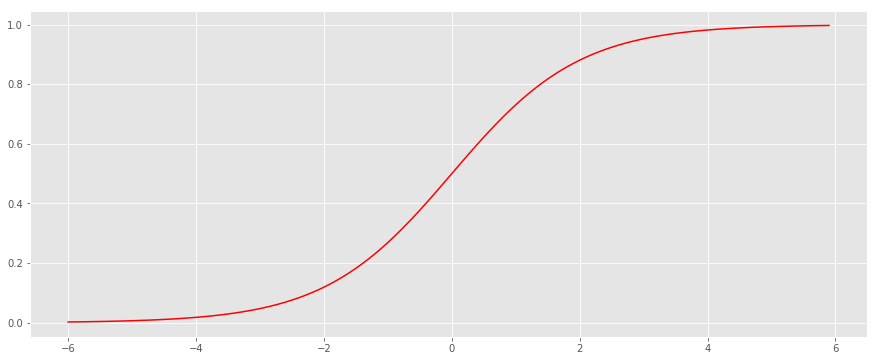

In [3]:
# define the sigmoid function
plt.figure(figsize=(15,6))

def sigmoid(t):
    return (1/(1+np.e**(-t)))

plot_range = np.arange(-6,6,0.1)

y_values = sigmoid(plot_range)

#plot the sigmoid curve
plt.plot(plot_range,
        y_values,
        color='red')


In [4]:
# Logistic Regression using Titanic Dataset
titanic_train = pd.read_csv('https://raw.githubusercontent.com/pcsanwald/kaggle-titanic/master/train.csv')

In [5]:
titanic_train.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
titanic_train.isnull().sum()  #missing value

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [12]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
cabin       204 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [13]:
set(titanic_train.cabin)

{nan,
 'C110',
 'D28',
 'F E69',
 'C90',
 'C65',
 'B82 B84',
 'B58 B60',
 'C125',
 'A20',
 'C7',
 'B39',
 'A34',
 'D6',
 'C54',
 'C99',
 'E50',
 'B94',
 'C30',
 'D30',
 'C104',
 'C83',
 'D45',
 'A19',
 'A26',
 'C22 C26',
 'B86',
 'B50',
 'E36',
 'A7',
 'E33',
 'C148',
 'C126',
 'B41',
 'E58',
 'B18',
 'C85',
 'B38',
 'A10',
 'C95',
 'F G73',
 'C47',
 'B102',
 'D36',
 'B35',
 'E121',
 'B22',
 'E63',
 'B80',
 'F33',
 'F38',
 'B3',
 'E17',
 'C111',
 'E34',
 'D21',
 'D48',
 'F4',
 'C50',
 'D10 D12',
 'C2',
 'E67',
 'F G63',
 'D20',
 'T',
 'C86',
 'C62 C64',
 'D17',
 'A31',
 'C82',
 'D11',
 'C78',
 'E46',
 'B42',
 'C49',
 'D26',
 'B77',
 'A5',
 'D50',
 'D37',
 'E44',
 'G6',
 'B49',
 'C46',
 'C45',
 'C106',
 'A36',
 'B96 B98',
 'C52',
 'B57 B59 B63 B66',
 'E24',
 'A32',
 'B37',
 'A14',
 'C91',
 'B4',
 'E77',
 'B78',
 'B5',
 'B71',
 'D56',
 'C68',
 'D9',
 'B101',
 'E25',
 'B79',
 'C118',
 'F2',
 'B73',
 'A6',
 'C32',
 'C123',
 'E38',
 'D19',
 'E49',
 'C92',
 'D33',
 'E10',
 'C101',
 'C128',
 

In [19]:
len(set(titanic_train.cabin))

148

In [20]:
char_cabin = titanic_train['cabin'].astype(str)

In [21]:
new_Cabin = np.array([cabin[0] for cabin in char_cabin])

In [22]:
titanic_train['cabin'] =pd.Categorical(new_Cabin)


In [23]:
titanic_train.head(3)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,n,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,n,S


In [14]:
# Assignment:
#1. People who travel with their parents in an upper class ticket has higher chances of survival: prove it

#2. Kids who travel with nannies has less chance of survival: prove it

#3. male greater than 20 years and less than 40 years has no association with survival rate, prove it

#4. people having no kids and traveling in upper class has lower survival rate, prove it

#5. people who are rich but travel in third class has higher chances of survival, prove it 

In [24]:
set(titanic_train.cabin)

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'n'}

In [25]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
cabin       891 non-null category
embarked    889 non-null object
dtypes: category(1), float64(2), int64(4), object(4)
memory usage: 70.9+ KB


In [26]:
np.where(titanic_train['embarked'].isnull())

(array([ 61, 829], dtype=int64),)

In [27]:
set(titanic_train.embarked)

{nan, 'Q', 'C', 'S'}

In [28]:
titanic_train.age.isnull().sum()/titanic_train.shape[0] #percentage of missing data

0.19865319865319866

In [52]:
import seaborn as sns

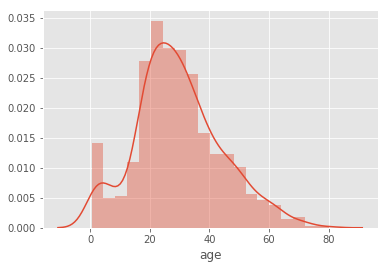

In [53]:
sns.distplot(titanic_train.age.dropna())  #+ve skewed

In [54]:
titanic_train.age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [55]:
titanic_train.age.skew()

0.38910778230082704

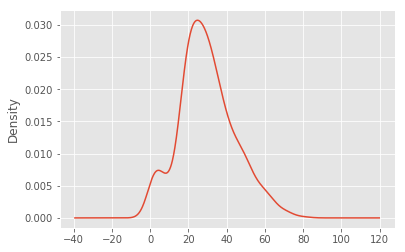

In [56]:
titanic_train.age.plot(kind='density')

In [57]:
891-714

177

In [58]:
new_age_var = pd.DataFrame(np.where(titanic_train['age'].isnull(),
                      28.00,
                      titanic_train["age"]))    #replacing the na with 28(median)

In [59]:
new_age_var.describe()

,0
count,891.000000
mean,29.361582
std,13.019697
min,0.420000
25%,22.000000
50%,28.000000
75%,35.000000
max,80.000000


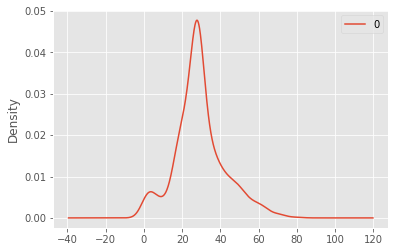

In [60]:
new_age_var.plot(kind='density')

C:\Users\Tcll.Bantl23\New folder\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Tcll.Bantl23\New folder\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


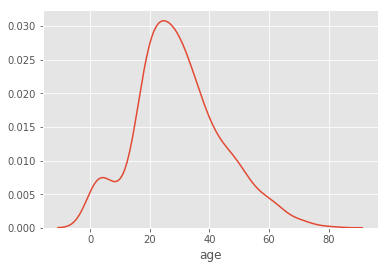

In [62]:
sns.distplot(titanic_train.age,hist=False) 

In [63]:
titanic_train['age']= new_age_var

In [65]:
titanic_train.head(3)


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,n,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,n,S


In [66]:
from sklearn import linear_model
from sklearn import preprocessing

In [67]:
#initialize label encoder
label_encoder= preprocessing.LabelEncoder()

In [68]:
# convert the Sex variable into numeric
encoded_sex= label_encoder.fit_transform(titanic_train['sex'])
encoded_sex[:3]

array([1, 0, 0], dtype=int64)

In [69]:
# Initialize the logistic regression model
log_model = linear_model.LogisticRegression()
log_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
help(linear_model.LogisticRegression())

Help on LogisticRegression in module sklearn.linear_model.logistic object:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the cross-
 |  entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag' and 'lbfgs' solvers. It can handle
 |  both dense and sparse input. Use C-ordered arrays or CSR matrices
 |  containing 64-bit floats for optimal performance; any other input format
 |  will be converted (and copied).
 |  
 |  The 'newton-cg', 'sag', and 'lbfgs' solv

In [71]:
# Train the model
log_model.fit(X=pd.DataFrame(encoded_sex),
             y= titanic_train["survived"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [72]:
# check the model
print(log_model.intercept_)
print(log_model.coef_)


[ 1.00027876]
[[-2.43010712]]


In [73]:
log_model.predict(X = pd.DataFrame(encoded_sex))[:10]


array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [74]:
# make predictions
preds = log_model.predict_proba(X = pd.DataFrame(encoded_sex))
preds = pd.DataFrame(preds)
preds.columns = ['No_Survival','Survived']

In [75]:
encoded_sex[0:10]

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [76]:
print (preds.head(15))

    No_Survival  Survived
0      0.806875  0.193125
1      0.268887  0.731113
2      0.268887  0.731113
3      0.268887  0.731113
4      0.806875  0.193125
5      0.806875  0.193125
6      0.806875  0.193125
7      0.806875  0.193125
8      0.268887  0.731113
9      0.268887  0.731113
10     0.268887  0.731113
11     0.268887  0.731113
12     0.806875  0.193125
13     0.806875  0.193125
14     0.268887  0.731113


In [77]:
predicted = np.where(preds['Survived']>0.8,0,1)

In [78]:
titanic_train['survived'].value_counts()/len(titanic_train['survived'])

0    0.616162
1    0.383838
Name: survived, dtype: float64

In [79]:
342/891

0.3838383838383838

In [80]:
confusion_matrix(titanic_train['survived'],predicted)


NameError: name 'confusion_matrix' is not defined

In [81]:
print(classification_report(titanic_train['survived'],predicted))

NameError: name 'classification_report' is not defined

In [53]:
from sklearn.metrics import confusion_matrix, classification_report

In [70]:
# result is not up to expectation, hence we need to add more variables into the model and see the prediction
encoded_class= label_encoder.fit_transform(titanic_train['pclass'])
encoded_cabin= label_encoder.fit_transform(titanic_train['cabin'])

In [72]:
train_features = pd.DataFrame([encoded_class,
                              encoded_cabin,
                              encoded_sex,
                              titanic_train["age"]]).T

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
# Initialize the logistic regression model
log_model = linear_model.LogisticRegression()

In [75]:
# Train the model
log_model.fit(X=train_features,y = titanic_train["survived"])


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [76]:
# check the model
print(log_model.intercept_)
print(log_model.coef_)

[3.32716302]
[[-0.90790164 -0.06426483 -2.43179802 -0.0265924 ]]


In [77]:
# make predictions
preds = log_model.predict(X = train_features)
pd.crosstab(preds,titanic_train['survived'])


survived,0,1
row_0,,
0,463,98
1,86,244


In [78]:
print(confusion_matrix(preds,titanic_train['survived'])) #0.5 prob cut
print(classification_report(preds,titanic_train['survived']))

[[463  98]
 [ 86 244]]
             precision    recall  f1-score   support

          0       0.84      0.83      0.83       561
          1       0.71      0.74      0.73       330

avg / total       0.80      0.79      0.79       891



In [79]:
print(confusion_matrix(pred_y,titanic_train['survived'])) # 0.7 prob cut
print(classification_report(pred_y,titanic_train['survived']))

NameError: name 'pred_y' is not defined

In [80]:
log_model.score(X= train_features,
               y=titanic_train['survived'])

0.7934904601571269

In [81]:
preds = log_model.predict_proba(X= train_features)
preds = pd.DataFrame(preds)
preds.columns = ['No_Survival','Survived']

In [94]:
preds_class = log_model.predict(X= train_features)
preds_class[0:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [82]:
preds.head()

,No_Survival,Survived
0,0.882839,0.117161
1,0.100822,0.899178
2,0.424131,0.575869
3,0.093817,0.906183
4,0.914142,0.085858


In [83]:
from sklearn import metrics


In [84]:
def func(x):
    x = np.where(x>0.7,0,1)
    return x

In [85]:
pred_y = func(preds.No_Survival)


In [86]:
preds = log_model.predict(X = train_features) # with a probability threshold of 0.50
pd.crosstab(preds,titanic_train['survived'])


survived,0,1
row_0,,
0,463,98
1,86,244


In [87]:
fpr,tpr,_ = metrics.roc_curve(titanic_train['survived'],preds)

In [88]:
df = pd.DataFrame(dict(fpr=fpr,tpr=tpr))

In [89]:
df.head()

,fpr,tpr
0,0.000000,0.00000
1,0.156648,0.71345
2,1.000000,1.00000


In [90]:
AUC = metrics.auc(fpr,tpr)

In [91]:
print (AUC)

0.7784009203336208


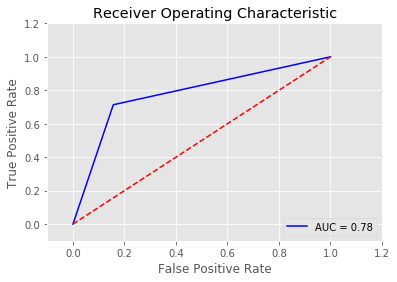

In [92]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% AUC)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#Assignment
#1. Refine the model and improve the accuracy

# Next Class

In [78]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',
                  header=None)

In [79]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [80]:
data.columns = ['code_num','Clump_Thickness','Cell_Size','Cell_Shape','Adhesion','Single_Epithelial','Bare_Nuclei',
               'Bland_Chromatin','Normal_Nucleoli','Mitoses','Class']

In [81]:
data.head()

,code_num,Clump_Thickness,Cell_Size,Cell_Shape,Adhesion,Single_Epithelial,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [82]:
data.count()

code_num             699
Clump_Thickness      699
Cell_Size            699
Cell_Shape           699
Adhesion             699
Single_Epithelial    699
Bare_Nuclei          699
Bland_Chromatin      699
Normal_Nucleoli      699
Mitoses              699
Class                699
dtype: int64

In [83]:
list(data.columns.values)

['code_num',
 'Clump_Thickness',
 'Cell_Size',
 'Cell_Shape',
 'Adhesion',
 'Single_Epithelial',
 'Bare_Nuclei',
 'Bland_Chromatin',
 'Normal_Nucleoli',
 'Mitoses',
 'Class']

In [84]:
df = data

In [85]:
df.columns.tolist

<bound method Index.tolist of Index(['code_num', 'Clump_Thickness', 'Cell_Size', 'Cell_Shape', 'Adhesion',
       'Single_Epithelial', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')>

In [86]:
df = df.dropna()

In [87]:
df.head()

,code_num,Clump_Thickness,Cell_Size,Cell_Shape,Adhesion,Single_Epithelial,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [88]:
df.count()

code_num             699
Clump_Thickness      699
Cell_Size            699
Cell_Shape           699
Adhesion             699
Single_Epithelial    699
Bare_Nuclei          699
Bland_Chromatin      699
Normal_Nucleoli      699
Mitoses              699
Class                699
dtype: int64

In [89]:
import matplotlib.pyplot as plt
import numpy as np

In [90]:
df.shape[0]
df_train = df.iloc[0:400,:]
df_test = df.iloc[401:,:]

In [91]:
df_train.shape

(400, 11)

In [92]:
df_test.shape

(298, 11)

In [93]:
formula = 'Class ~ code_num + Clump_Thickness + Cell_Size + Cell_Shape + Adhesion + Single_Epithelial + Bare_Nuclei + Bland_Chromatin + Normal_Nucleoli + Mitoses'

In [94]:
import patsy
from patsy import dmatrices

In [95]:
YTrain, XTrain = dmatrices(formula, data = df_train, return_type = 'dataframe')
YTest, XTest = dmatrices(formula, data = df_test, return_type = 'dataframe')

In [96]:
print (YTrain.shape, XTrain.shape,YTest.shape, XTest.shape)


(400, 1) (400, 20) (298, 1) (298, 18)


In [97]:
import statsmodels.formula.api as sm

In [112]:
YTrain = np.array(YTrain).ravel()
YTest = np.array(YTest).ravel()

In [99]:
from sklearn.linear_model import LogisticRegression

In [101]:
model1 = LogisticRegression()
print (model1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [113]:
model1.fit(XTrain,YTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [106]:
model1.score(XTrain,YTrain)

0.57250000000000001

In [114]:
modelCancer = LogisticRegression(penalty='l2')
modelCancer.fit(XTrain,YTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [115]:
modelCancer.score(XTrain,YTrain)

0.57250000000000001

In [117]:
modelCancer = LogisticRegression(penalty='l1')
modelCancer.fit(XTrain,YTrain)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [118]:
modelCancer.score(XTrain,YTrain)

0.95499999999999996

In [119]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets

In [120]:
diabetes = datasets.load_diabetes()

In [121]:
X = diabetes.data
Y = diabetes.target

In [122]:
alphas,_,coefs = linear_model.lars_path(X,Y, method='lasso',verbose=True)

.

In [123]:
alphas

array([ 2.14804358,  2.01202713,  1.02466283,  0.71509967,  0.29441369,
        0.20086523,  0.15602991,  0.04520646,  0.01239247,  0.01151398,
        0.00493722,  0.00296479,  0.        ])

In [124]:
coefs

array([[   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,   -5.718948  ,   -7.01124515,
         -10.01219782],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,  -74.91651394, -111.97855446, -197.75650114,
        -226.13366183, -227.17579824, -234.39762164, -237.100786  ,
        -239.81908937],
       [   0.        ,   60.11926965,  361.89461246,  434.75795962,
         505.65955847,  511.3480707 ,  512.04408899,  522.26484702,
         526.88546671,  526.39059435,  522.64878576,  521.0751302 ,
         519.83978679],
       [   0.        ,    0.        ,    0.        ,   79.23644688,
         191.26988358,  234.15461616,  252.5270165 ,  297.15973689,
         314.38927158,  314.95046722,  320.34255435,  321.54902678,
         324.39042769],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.       

In [125]:
XX = np.sum(np.abs(coefs.T),axis=1)
XX/= XX[-1]

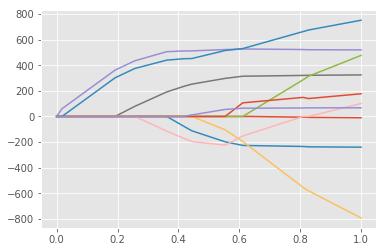

In [126]:
plt.plot(XX,coefs.T)
plt.show()

In [127]:
modelCancer.score(XTrain,YTrain)

0.95499999999999996

In [128]:
from sklearn.datasets import load_digits
digitData = load_digits()

In [130]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

In [131]:
scaler = StandardScaler()

In [132]:
X = digitData['data']
Y = digitData['target']

In [133]:
print (Y)


[0 1 2 ..., 8 9 8]


In [134]:
XTrain, XTest, YTrain, YTest = train_test_split(X,Y,test_size=0.25,random_state=1234)


In [135]:
XTrain.shape, XTest.shape, YTrain.shape, YTest.shape

((1347, 64), (450, 64), (1347,), (450,))

In [136]:
from sklearn.linear_model import LogisticRegression

In [137]:
modelDigit = LogisticRegression(penalty='l1')
modelDigit.fit(XTrain,YTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [138]:
modelDigit.score(XTrain,YTrain)

0.99628804751299183

In [139]:
modelDigit.score(XTest,YTest)

0.9622222222222222

In [140]:
from sklearn import metrics
preds = modelDigit.predict(XTest)

In [141]:
print (metrics.confusion_matrix(YTest,preds))


[[37  0  0  0  0  0  0  0  0  0]
 [ 0 46  0  0  0  0  1  0  0  0]
 [ 0  0 48  1  0  0  0  0  0  0]
 [ 0  0  0 43  0  1  0  0  0  0]
 [ 0  1  0  0 49  0  0  1  1  0]
 [ 0  0  0  0  0 48  1  0  0  0]
 [ 0  1  0  0  0  0 43  0  1  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  2  1  1  0  0  0  0 38  1]
 [ 0  0  0  0  0  0  0  1  2 41]]


In [143]:
print (metrics.classification_report(YTest, preds))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.92      0.98      0.95        47
          2       0.98      0.98      0.98        49
          3       0.96      0.98      0.97        44
          4       1.00      0.94      0.97        52
          5       0.98      0.98      0.98        49
          6       0.96      0.96      0.96        45
          7       0.95      1.00      0.98        40
          8       0.90      0.88      0.89        43
          9       0.98      0.93      0.95        44

avg / total       0.96      0.96      0.96       450



In [144]:
log_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [145]:
modelDigit

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
# AUC = 0.8----1.0----Very good model
# AUC = 0.7 ----0.8 -- good model
# AUC = 0.5---0.7--- needs improvement
# AUC = < 0.5 ---BAD